<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [223]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

In [225]:
sac = pd.read_csv(sac_csv)
sac.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [226]:
sac.describe()

zip        beds       baths       sq__ft          price  \
count    985.000000  985.000000  985.000000   985.000000     985.000000   
mean   95750.697462    2.911675    1.776650  1312.918782  233715.951269   
std       85.176072    1.307932    0.895371   856.123224  139088.818896   
min    95603.000000    0.000000    0.000000  -984.000000 -210944.000000   
25%    95660.000000    2.000000    1.000000   950.000000  145000.000000   
50%    95762.000000    3.000000    2.000000  1304.000000  213750.000000   
75%    95828.000000    4.000000    2.000000  1718.000000  300000.000000   
max    95864.000000    8.000000    5.000000  5822.000000  884790.000000   

         latitude   longitude  
count  985.000000  985.000000  
mean    38.445121 -121.193371  
std      5.103637    5.100670  
min   -121.503471 -121.551704  
25%     38.482704 -121.446119  
50%     38.625932 -121.375799  
75%     38.695589 -121.294893  
max     39.020808   38.668433

We right away notice that there min value for square feet and minimum value for price is a negative value. This looks like incorrect data. 

In [227]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [228]:
'''The step below is looking for aparments that have zero or negative square feet'''
sac.loc[sac['sq__ft']<=0]

street             city    zip state  beds  \
73                        17 SERASPI CT       SACRAMENTO  95834    CA     0   
89                     2866 KARITSA AVE       SACRAMENTO  95833    CA     0   
100               12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0   
121                 5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0   
126                 2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0   
132                 3020 RICHARDSON CIR  EL DORADO HILLS  95762    CA     3   
133                  8082 LINDA ISLE LN       SACRAMENTO  95831    CA     0   
147                       9278 DAIRY CT        ELK GROVE  95624    CA     0   
153                  868 HILDEBRAND CIR           FOLSOM  95630    CA     0   
154                    6030 PALERMO WAY  EL DORADO HILLS  95762    CA     4   
155                     4070 REDONDO DR  EL DORADO HILLS  95762    CA     4   
157                        315 JUMEL CT  EL DORADO HILLS  95762    CA     6   
169                    14788 NATCHEZ CT   RANCHO MURIETA  95683    CA     0   
192        5201 LAGUNA OAKS DR Unit 126        ELK GROVE  95758    CA     0   
223                      2778 KAWEAH CT     CAMERON PARK  95682    CA     3   
224                  1636 ALLENWOOD CIR          LINCOLN  95648    CA     4   
227            2370 BIG CANYON CREEK RD      PLACERVILLE  95667    CA     3   
230                     3361 BOW MAR CT     CAMERON PARK  95682    CA     2   
234           3139 SPOONWOOD WAY Unit 1       SACRAMENTO  95833    CA     0   
236                     2340 HURLEY WAY       SACRAMENTO  95825    CA     0   
248                 611 BLOSSOM ROCK LN           FOLSOM  95630    CA     0   
249                        8830 ADUR RD        ELK GROVE  95624    CA     0   
253                     221 PICASSO CIR       SACRAMENTO  95835    CA     0   
262                    632 NEWBRIDGE LN          LINCOLN  95648    CA     4   
265                    230 BANKSIDE WAY       SACRAMENTO  95835    CA     0   
268               4236 ADRIATIC SEA WAY       SACRAMENTO  95834    CA     0   
278                     1102 CHESLEY LN          LINCOLN  95648    CA     4   
279    11281 STANFORD COURT LN Unit 604       GOLD RIVER  95670    CA     0   
285                     3224 PARKHAM DR        ROSEVILLE  95747    CA     0   
286                       15 VANESSA PL       SACRAMENTO  95835    CA     0   
..                                  ...              ...    ...   ...   ...   
826               5420 ALMOND FALLS WAY   RANCHO CORDOVA  95742    CA     0   
828             1515 EL CAMINO VERDE DR          LINCOLN  95648    CA     0   
830              1792 DIAMOND WOODS CIR        ROSEVILLE  95747    CA     4   
835                   2818 KNOLLWOOD DR     CAMERON PARK  95682    CA     3   
836                1536 STONEY CROSS LN          LINCOLN  95648    CA     0   
837                   509 CASTILLIAN CT        ROSEVILLE  95747    CA     5   
843                     2159 BECKETT DR  EL DORADO HILLS  95762    CA     3   
844                4320 FOUR SEASONS RD      PLACERVILLE  95667    CA     3   
845                    6401 MARSHALL RD    GARDEN VALLEY  95633    CA     3   
846                     2089 BECKETT DR  EL DORADO HILLS  95762    CA     4   
847                    6196 EDGEHILL DR  EL DORADO HILLS  95762    CA     5   
848                    200 HILLSFORD CT        ROSEVILLE  95747    CA     0   
850               4841 VILLAGE GREEN DR  EL DORADO HILLS  95762    CA     4   
852                         820 DANA CT           AUBURN  95603    CA     4   
856                    1800 AVONDALE DR        ROSEVILLE  95747    CA     5   
857                    4620 BROMWICH CT          ROCKLIN  95677    CA     4   
859                   4478 GREENBRAE RD          ROCKLIN  95677    CA     0   
861              200 CRADLE MOUNTAIN CT  EL DORADO HILLS  95762    CA     0   
862              2065 IMPRESSIONIST WAY  EL DORADO HILLS  95762    CA     0   
863 

In [229]:
sac_clean = sac.loc[sac['sq__ft']>0]
sac_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 984
Data columns (total 12 columns):
street       813 non-null object
city         813 non-null object
zip          813 non-null int64
state        813 non-null object
beds         813 non-null int64
baths        813 non-null int64
sq__ft       813 non-null int64
type         813 non-null object
sale_date    813 non-null object
price        813 non-null int64
latitude     813 non-null float64
longitude    813 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.6+ KB


In [230]:
sac_clean_non_zero_sq_foot = sac_clean

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

The good set of continous variables that could be used to predict the housing prices would be beds, baths, sq_ft). Some of the other categorical variables that could be used are (street, type, sale_date). They need to be converted into dummy variables before applying it to the the model

In [231]:
'''Analyzing the Types of Apartments in the Dataset'''
sac_clean_non_zero_sq_foot['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [232]:
sac_new = pd.get_dummies(sac_clean_non_zero_sq_foot, columns=['type'],drop_first=True)
sac_new.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

                      sale_date  price   latitude   longitude  \
0  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879   
1  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028   
2  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839   
3  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146   
4  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768   

   type_Multi-Family  type_Residential  
0                  0                 1  
1                  0                 1  
2                  0                 1  
3                  0                 1  
4                  0                 1

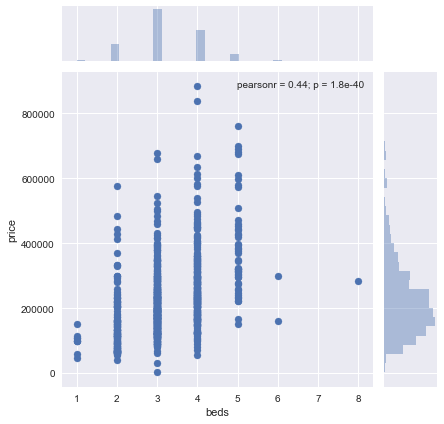

In [233]:
'''Jointplot to plot the Number of Bed Rooms in the apartment with the price of the apartment'''
sns.jointplot(sac_clean_non_zero_sq_foot['beds'], sac_clean_non_zero_sq_foot['price'])

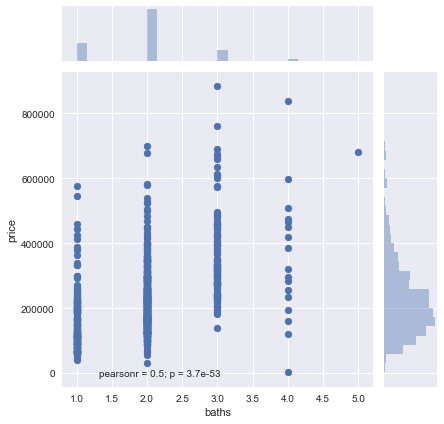

In [234]:
'''Jointplot to plot the number of bathrooms in the apartment with the price of the apartment'''
sns.jointplot(sac_clean_non_zero_sq_foot['baths'], sac_clean_non_zero_sq_foot['price'])

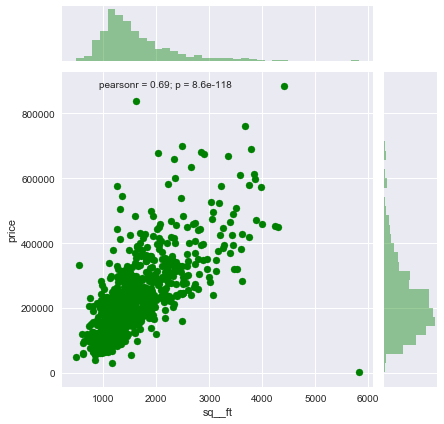

In [235]:
'''Jointplot to plot the square footage of the apartment with the price of the apartment'''
sns.jointplot(sac_clean_non_zero_sq_foot['sq__ft'], sac_clean_non_zero_sq_foot['price'], color = 'g')

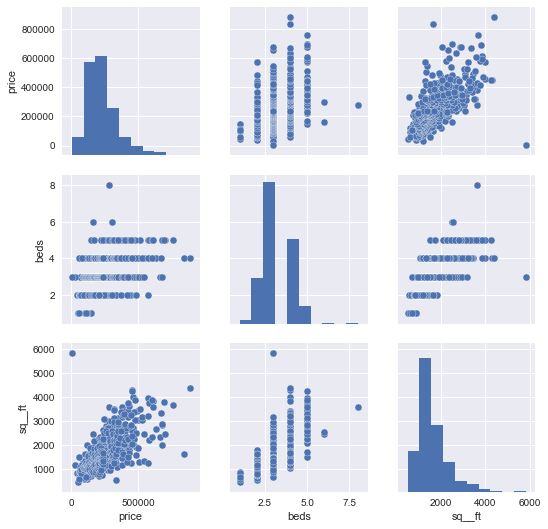

In [236]:
sns.pairplot(sac_new[['price', 'beds', 'sq__ft']],diag_kind="hist")

The variable that could form the best predictor of the price given all the plots is probably the square footage. Other good variables are probably number of bedrooms. The other kind of categorical variable (converted into a dummy) that would be good predictor variable is type of the apartment (type_Residential, or type_Multi-Family)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [237]:
'''Machine learning using sklearn'''
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm = linear_model.LinearRegression()
X = sac_new[['sq__ft']]
# X = sac_new[['baths']]
y = sac_new['price']

model = lm.fit(X,y)
predictions = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
r2 = r2_score(y, predictions)


print('R Square: ', model.score(X,y))
print ('Intercept: ', model.intercept_)
print ('Coefficient: ', model.coef_)
print ('RMSE:', rmse)
# print (r2)

R Square:  0.481499561544
Intercept:  29984.3617265
Coefficient:  [ 125.31418258]
RMSE: 86281.5050245


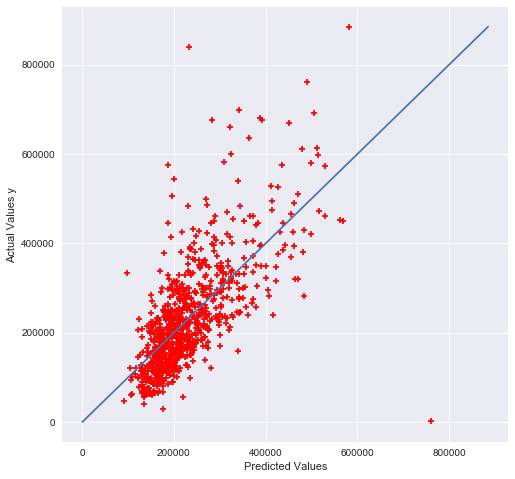

In [238]:
predictions  =  model.predict(X)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

In [239]:
'''Machine learning using sklearn. This model selects more features than the one above'''

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm = linear_model.LinearRegression()
X = sac_new[['beds','sq__ft','type_Residential']]
y = sac_new['price']

model = lm.fit(X,y)
predictions = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
r2 = r2_score(y, predictions)


print('R Square: ', model.score(X,y))
print ('Intercept: ', model.intercept_)
print ('Coefficient: ', model.coef_)
print (rmse)

R Square:  0.490742884569
Intercept:  21891.3761674
Coefficient:  [-13584.81707264    135.31362932  38869.75013884]
85508.9750608


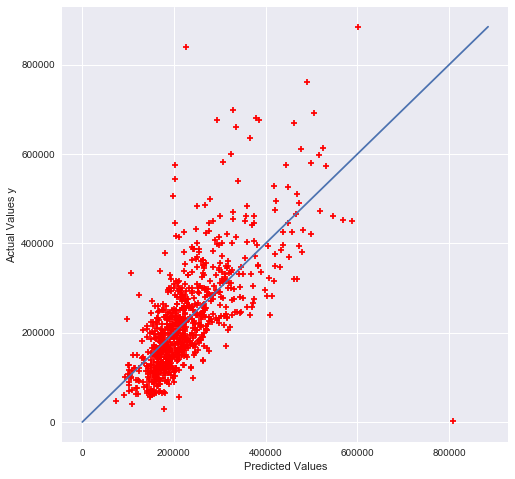

In [240]:
# Y - Y_hat
predictions  =  model.predict(X)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

** Including a few more independent variables has improved the model marginally. We see that R Square has improved to 0.49 while including beds, square_footage and type_Residential. The RMSE is around $85K ** 

**Based on the results of the test above we can conclude that single variable that is a good predictor is "sq__ft". However a a combination of beds,sq_ft and type_residential also provides a good model**

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [241]:
def f_min_sse(X,Y,df): 
    '''X and Y are the pandas column names that are passed as strings'''
    y_bar = df[Y].mean()
    x_bar = df[X].mean()
    std_x = df[X].std()
    std_y = df[Y].std()
    r_xy = df[X].corr(df[Y])
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1*x_bar
    return(beta_0, beta_1)


f_min_sse('sq__ft', 'price', sac_new)

print ("Beta_0:", f_min_sse('sq__ft', 'price', sac_new)[0])
print ("Beta_1:", f_min_sse('sq__ft', 'price', sac_new)[1])

beta_0 = f_min_sse('sq__ft', 'price', sac_new)[0]
beta_1 = f_min_sse('sq__ft', 'price', sac_new)[1]

Beta_0: 29984.3617265
Beta_1: 125.314182575


In [242]:
sac_new['Linear_Yhat'] = beta_0 + beta_1*sac_new['sq__ft']
sac_new.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

                      sale_date  price   latitude   longitude  \
0  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879   
1  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028   
2  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839   
3  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146   
4  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768   

   type_Multi-Family  type_Residential    Linear_Yhat  
0                  0                 1  134747.018359  
1                  0                 1  176226.012792  
2                  0                 1  129734.451056  
3                  0                 1  136752.045281  
4                  0                 1  129859.765239

In [245]:
'''Calculating the new RMSE'''
np.sqrt(np.square(sac_new['price'] - sac_new['Linear_Yhat']).mean())

86281.505024490732

### 6. Interpret the intercept. Interpret the slope.

**Slope (beta_1) ** Predicts the magnitude of change in the dependent variable (Y) for a unit change in the independent variable (x)

**Intercept (beta_0)** The intercept is the value of Y when the independent variable(x) == 0. In situations where X cannot be equal to 0, the intercept has no intrinsic value 

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**Inference Statistics:** Helps us understand the relationshiop between the different dependent variables, and the relaltionship between the depenedent variables and the independent variables 

**Prediction:** This model could be used to predict home prices based on the dependent variables under consideration (#beds, #squarefootage, type). The equation also has weights for each of the independent variables

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

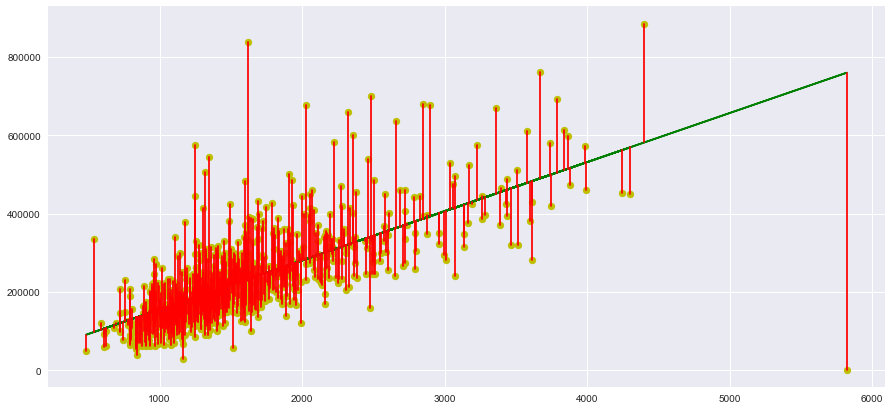

In [253]:
# create a figure
fig = plt.figure(figsize=(15,7))

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=sac_new['sq__ft'], y=sac_new['price'], c='y')
ax.plot(sac_new['sq__ft'], sac_new['Linear_Yhat'], color='g');

for _, row in sac_new.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Linear_Yhat']), 'r-')